# Notebook: 02 - Data Preprocessing & Feature Engineering
**Author:** Osamah (Data/Model Engineer)  
**Team:** Data Detectives  
**Purpose:** To experiment with, validate, and demonstrate the data preprocessing pipeline defined in `src/data/preprocessing.py`.

## 1. Setup & Data Import



In [14]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the 'src' directory to the path to import our custom module
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

# Import our custom preprocessing module
from src.data.preprocessing import *

# Set plotting style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

# Suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load the raw data (replicating Ali's work from Phase 2)
column_names = ['unit_id', 'time_cycles'] \
               + [f'op_setting_{i}' for i in range(1,4)] \
               + [f'sensor_{i}' for i in range(1,22)]

train_df = pd.read_csv('../data/train_FD001.txt', delim_whitespace=True, header=None, names=column_names)

print("Data loaded successfully!")
print(f"Dataset Shape: {train_df.shape}")
train_df.head()

Data loaded successfully!
Dataset Shape: (20631, 26)


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [16]:
# Check for missing values (should be none)
print("Missing Values Check:")
print(train_df.isnull().sum().sum())

# Check basic stats
print("\nBasic Dataset Info:")
train_df.info()

# Check the lifespan of the first few engines
print("\nLifespan (max cycles) for first 5 engines:")
print(train_df.groupby('unit_id')['time_cycles'].max().head())

Missing Values Check:
0

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit_id       20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-

In [17]:
# Test the RUL function in isolation
df_with_rul = add_rul_column(train_df.copy())
print(f"DataFrame shape after adding RUL: {df_with_rul.shape}")
print("\nNew 'RUL' column sample:")
print(df_with_rul[['unit_id', 'time_cycles', 'RUL']].head(10))

# Validate RUL calculation for a specific engine (e.g., unit_id 1)
engine_1 = df_with_rul[df_with_rul['unit_id'] == 1]
max_cycle_1 = engine_1['time_cycles'].max()
print(f"\nValidation for Engine 1:")
print(f"Max cycle: {max_cycle_1}")
print(f"RUL at first cycle: {engine_1['RUL'].iloc[0]}")
print(f"RUL at last cycle: {engine_1['RUL'].iloc[-1]} (should be 0)")
df_with_rul.head()

DataFrame shape after adding RUL: (20631, 27)

New 'RUL' column sample:
   unit_id  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187
5        1            6  186
6        1            7  185
7        1            8  184
8        1            9  183
9        1           10  182

Validation for Engine 1:
Max cycle: 192
RUL at first cycle: 191
RUL at last cycle: 0 (should be 0)


,unit_id,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [18]:
# Based on Ali's EDA, we start with these highly correlated sensors
important_sensors = [4, 7, 11, 12, 15]

# Test the feature engineering function
df_with_features = create_advanced_features(df_with_rul, important_sensors)

# Inspect the new columns
new_feature_columns = [col for col in df_with_features.columns if 'MA' in col or 'Std' in col or 'CumSum' in col]
print(f"Created {len(new_feature_columns)} new advanced features.")
print("New feature columns:", new_feature_columns)

# Let's see the result for Engine 1
engine_1_enhanced = df_with_features[df_with_features['unit_id'] == 1]
engine_1_enhanced[['time_cycles', 'sensor_11', 'sensor_11_MA_5', 'sensor_11_Rolling_Std']].head(10)

Created 15 new advanced features.
New feature columns: ['sensor_4_MA_5', 'sensor_4_Rolling_Std', 'sensor_4_CumSum', 'sensor_7_MA_5', 'sensor_7_Rolling_Std', 'sensor_7_CumSum', 'sensor_11_MA_5', 'sensor_11_Rolling_Std', 'sensor_11_CumSum', 'sensor_12_MA_5', 'sensor_12_Rolling_Std', 'sensor_12_CumSum', 'sensor_15_MA_5', 'sensor_15_Rolling_Std', 'sensor_15_CumSum']


,time_cycles,sensor_11,sensor_11_MA_5,sensor_11_Rolling_Std
0,1,47.47,47.470,0.014142
1,2,47.49,47.480,0.014142
2,3,47.27,47.410,0.121655
3,4,47.13,47.340,0.171659
4,5,47.28,47.328,0.151063
5,6,47.16,47.266,0.141527
6,7,47.36,47.240,0.094074
7,8,47.24,47.234,0.092628
8,9,47.29,47.266,0.073348
9,10,47.03,47.216,0.127004


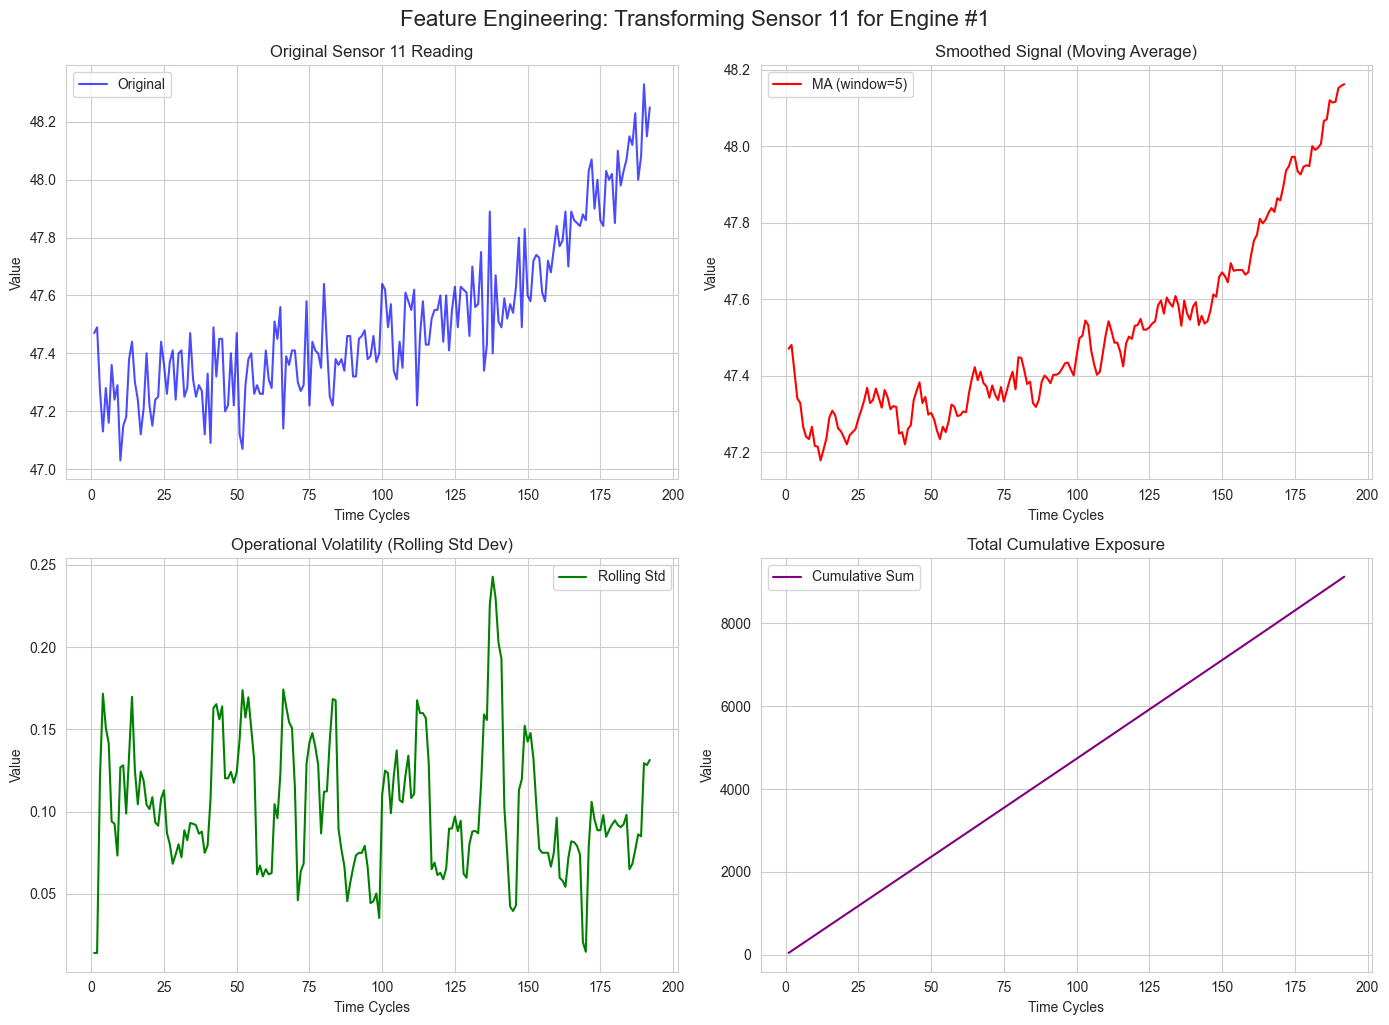

In [19]:
# Plot for a key sensor ( sensor_11)
plt.figure(figsize=(14, 10))

# Original Sensor Reading
plt.subplot(2, 2, 1)
plt.plot(engine_1_enhanced['time_cycles'], engine_1_enhanced['sensor_11'], label='Original', color='blue', alpha=0.7)
plt.title('Original Sensor 11 Reading')
plt.xlabel('Time Cycles')
plt.ylabel('Value')
plt.legend()

# Moving Average
plt.subplot(2, 2, 2)
plt.plot(engine_1_enhanced['time_cycles'], engine_1_enhanced['sensor_11_MA_5'], label='MA (window=5)', color='red')
plt.title('Smoothed Signal (Moving Average)')
plt.xlabel('Time Cycles')
plt.ylabel('Value')
plt.legend()

# Rolling Standard Deviation
plt.subplot(2, 2, 3)
plt.plot(engine_1_enhanced['time_cycles'], engine_1_enhanced['sensor_11_Rolling_Std'], label='Rolling Std', color='green')
plt.title('Operational Volatility (Rolling Std Dev)')
plt.xlabel('Time Cycles')
plt.ylabel('Value')
plt.legend()

# Cumulative Sum
plt.subplot(2, 2, 4)
plt.plot(engine_1_enhanced['time_cycles'], engine_1_enhanced['sensor_11_CumSum'], label='Cumulative Sum', color='purple')
plt.title('Total Cumulative Exposure')
plt.xlabel('Time Cycles')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.suptitle('Feature Engineering: Transforming Sensor 11 for Engine #1', fontsize=16, y=1.02)
plt.show()

In [20]:
# Run the full preprocessing pipeline
train_df_processed, fitted_scaler = prepare_train_data(train_df, important_sensors)

# Inspect the final processed dataset
print(f"\nFinal processed dataset shape: {train_df_processed.shape}")
print("\nFirst few rows of the processed dataset:")
pd.set_option('display.max_columns', 10) # Limit displayed columns for clarity
train_df_processed.head(10)
pd.set_option('display.max_columns', None) # Reset display option

# Show all processed columns
print("\nAll columns in the final processed dataset:")
print(train_df_processed.columns.tolist())

Initiating Data Preprocessing Pipeline...
Step 1: Engineering target variable 'RUL'...
Step 2: Creating advanced features (Moving Averages, Volatility, Cumulative Sums)...
Step 3: Normalizing features to a [0, 1] range...
Preprocessing complete! The data is now ready for modeling.

Final processed dataset shape: (20631, 42)

First few rows of the processed dataset:

All columns in the final processed dataset:
['unit_id', 'time_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL', 'sensor_4_MA_5', 'sensor_4_Rolling_Std', 'sensor_4_CumSum', 'sensor_7_MA_5', 'sensor_7_Rolling_Std', 'sensor_7_CumSum', 'sensor_11_MA_5', 'sensor_11_Rolling_Std', 'sensor_11_CumSum', 'sensor_12_MA_5', 'sensor_12_Rolling_Std', 'sensor_12_CumS

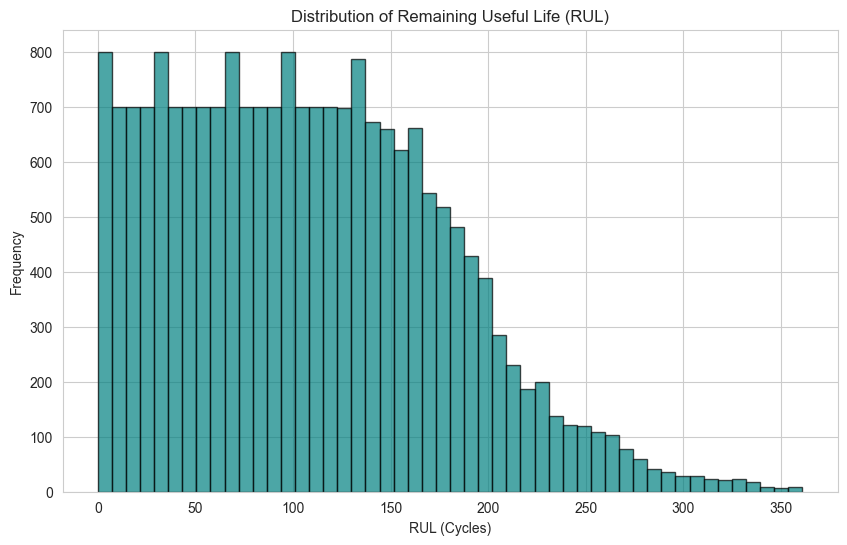

Top 15 features most correlated with RUL:
RUL                 1.000000
sensor_4_CumSum     0.737178
sensor_11_CumSum    0.737112
sensor_15_CumSum    0.736867
time_cycles         0.736241
sensor_12_CumSum    0.736025
sensor_7_CumSum     0.735999
sensor_4_MA_5       0.732976
sensor_11_MA_5      0.732275
sensor_15_MA_5      0.723144
sensor_12_MA_5      0.713225
sensor_7_MA_5       0.712092
sensor_11           0.696228
sensor_4            0.678948
sensor_12           0.671983
Name: RUL, dtype: float64


In [21]:
# Check the distribution of our target variable, RUL
plt.figure(figsize=(10, 6))
plt.hist(train_df_processed['RUL'], bins=50, edgecolor='black', alpha=0.7, color='teal')
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL (Cycles)')
plt.ylabel('Frequency')
plt.show()

# Check correlation of new features with the target RUL
# Create a list of our new advanced features
new_features = [col for col in train_df_processed.columns if 'MA' in col or 'Std' in col or 'CumSum' in col]
# Also include the original sensors for comparison
features_to_correlate = important_sensors + new_features

# Calculate correlation with RUL
corr_with_rul = train_df_processed.corr()['RUL'].abs().sort_values(ascending=False)

print("Top 15 features most correlated with RUL:")
print(corr_with_rul.head(15))

In [1]:
# Save the fully processed training data to a CSV for modeling
output_file_path = '../data/processed/train_FD001_processed.csv'
train_df_processed.to_csv(output_file_path, index=False)
print(f"✅ Processed training data saved to: {output_file_path}")

# Note: The fitted_scaler object should be saved (e.g., with joblib) for use during testing.
# We will do this in the next phase when we build the model pipeline.
# import joblib
# joblib.dump(fitted_scaler, '../models/minmax_scaler.gz')

NameError: name 'train_df_processed' is not defined

## Conclusions & Next Steps
### Summary of Achievements:

✅ Successfully loaded and validated the raw data.

✅ Engineered the target variable RUL.

✅ Created 15 new powerful features (3 for each of the 5 key sensors) using rolling statistics.

✅ Normalized all feature values to a [0, 1] range for stable model training.

✅ Produced a final dataset ready for machine learning.